## import lirbrary

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
import os
print(os.getcwd())

E:\kaggle\AnimeRecommendations


## 讀取資料

In [3]:
anime = pd.read_csv('E:/kaggle/AnimeRecommendations/anime.csv')
rating = pd.read_csv('E:/kaggle/AnimeRecommendations/rating.csv')


In [4]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [6]:
#看有幾種type
anime['type'].value_counts()

TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: type, dtype: int64

In [7]:
mergedata = pd.merge(rating,anime,on=['anime_id','anime_id'])
mergedata = mergedata[mergedata['type']=='Movie']
mergedata['rating_x'] = mergedata['rating_x'].replace(-1,np.nan)
mergedata.head(10)

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
98741,1,442,NaN,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...,"Adventure, Comedy, Drama, Historical, Shounen,...",Movie,1,7.17,120571
98742,5,442,4.0,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...,"Adventure, Comedy, Drama, Historical, Shounen,...",Movie,1,7.17,120571
98743,54,442,NaN,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...,"Adventure, Comedy, Drama, Historical, Shounen,...",Movie,1,7.17,120571
98744,99,442,2.0,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...,"Adventure, Comedy, Drama, Historical, Shounen,...",Movie,1,7.17,120571
98745,128,442,7.0,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...,"Adventure, Comedy, Drama, Historical, Shounen,...",Movie,1,7.17,120571
98746,129,442,8.0,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...,"Adventure, Comedy, Drama, Historical, Shounen,...",Movie,1,7.17,120571
98747,171,442,10.0,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...,"Adventure, Comedy, Drama, Historical, Shounen,...",Movie,1,7.17,120571
98748,188,442,NaN,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...,"Adventure, Comedy, Drama, Historical, Shounen,...",Movie,1,7.17,120571
98749,190,442,5.0,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...,"Adventure, Comedy, Drama, Historical, Shounen,...",Movie,1,7.17,120571
98750,201,442,10.0,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...,"Adventure, Comedy, Drama, Historical, Shounen,...",Movie,1,7.17,120571


In [8]:
mergedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1051998 entries, 98741 to 7813726
Data columns (total 9 columns):
user_id     1051998 non-null int64
anime_id    1051998 non-null int64
rating_x    842153 non-null float64
name        1051998 non-null object
genre       1051911 non-null object
type        1051998 non-null object
episodes    1051998 non-null object
rating_y    1051996 non-null float64
members     1051998 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 80.3+ MB


## Matrix Factorization

In [9]:
mergedata = mergedata[['user_id','anime_id','rating_x']]
mergedata = mergedata.sort_values(by=['user_id', 'anime_id'])
mergedata.head(10)

,user_id,anime_id,rating_x
98741,1,442,NaN
114691,1,936,NaN
159516,1,2144,NaN
502767,1,9790,NaN
623821,1,11737,NaN
1119556,3,199,10.0
1155152,3,430,7.0
1202066,3,1119,7.0
1205710,3,1121,7.0
1208381,3,1122,7.0


In [10]:
mergedata['rating_x'].value_counts()

8.0     218467
9.0     174873
7.0     173949
10.0    143301
6.0      76831
5.0      33718
4.0      12439
3.0       4558
2.0       2472
1.0       1545
Name: rating_x, dtype: int64

In [11]:
user_anime = pd.crosstab(mergedata['user_id'], mergedata['anime_id'])
user_anime.head(10)

anime_id,5,31,32,43,46,47,54,83,87,88,...,33449,33474,33484,33485,33511,33513,33674,33741,34048,34136
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,1,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
mergedata[mergedata['user_id']==7]

,user_id,anime_id,rating_x
3310215,7,31,9.0
3315745,7,32,9.0
3422800,7,1259,7.0
3495878,7,2759,9.0
3537696,7,3784,8.0
3545697,7,3785,9.0
3644497,7,9032,7.0
502768,7,9790,7.0
3666069,7,9958,9.0
3684927,7,11743,8.0


In [12]:
user_anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56498 entries, 1 to 73515
Columns: 2142 entries, 5 to 34136
dtypes: int64(2142)
memory usage: 923.7 MB


In [13]:
user_anime = user_anime.values
user_anime.shape

(56498, 2142)

In [14]:
user_anime

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

1
0.31211172316965546
2
0.34207002038468143
3
0.37435743067821325
4
0.3996163811891119
5
0.4186170889804466
6
0.4329219222955454
7
0.4438230319773939
8
0.45226080479614833
9
0.45889826689470414
10
0.4642014943685253
Run took 321.65 seconds


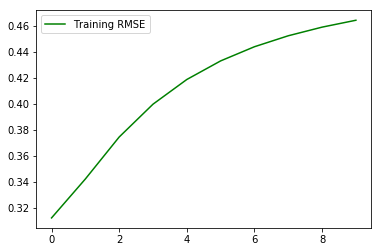

In [15]:
import timeit
start_time = timeit.default_timer()

# Scoring Function: Root Mean Squared Error
def rmse_score(R, Q, P):
    I = R != 0  # Indicator function which is zero for missing data
    ME = I * (R - np.dot(P, Q.T))  # Errors between real and predicted ratings
    MSE = ME**2  
    return np.sqrt(np.sum(MSE)/np.sum(I))  # sum of squared errors

# Set parameters and initialize latent factors
f = 20  # Number of latent factor pairs
lmbda = 0.5 # Regularisation strength
gamma=0.01  # Learning rate
n_epochs = 50  # Number of loops through training data

n_u = 56498 #len(df["user_id"].unique())
n_m = 2142 #len(df["item_id"].unique())

P =  np.random.rand(n_u, f) # Latent factors for users
Q =  np.random.rand(n_m, f) # Latent factors for movies


# Stochastic GD
train_errors = []
users,items = user_anime.nonzero()   
nn=0
for epoch in range(10):
    nn+=1
    for u, i in zip(users,items):
        e = user_anime[u, i] - np.dot(P[u, :], Q[i, :].T)  # Error for this observation
        P[u, :] += gamma * ( e * Q[i, :] - lmbda * P[u, :]) # Update this user's features
        Q[i, :] += gamma * ( e * P[u, :] - lmbda * Q[i, :])  # Update this movie's features    
    print(nn)
    train_errors.append(rmse_score(user_anime,Q,P)) # Training RMSE for this pass
    print(rmse_score(user_anime,Q,P))

# Print how long it took
print("Run took %.2f seconds" % (timeit.default_timer() - start_time))
    
# Check performance by plotting train and test errors
fig, ax = plt.subplots()
ax.plot(train_errors, color="g", label='Training RMSE')
ax.legend()

In [22]:
j=789
print(user_anime[users[j],items[j]],np.dot(P, Q.T)[users[j],items[j]])

1 0.4616362274644351


In [55]:
genre_features = anime.genre.str.get_dummies(sep=', ')
print(genre_features.shape)
genre_features.head()

(12294, 44)


,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
pd.merge(anime,genre_features, left_index=True, right_index=True)

,anime_id,name,genre,type,episodes,rating,members,Action,Adventure,Cars,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855,1,1,0,...,0,0,0,0,1,0,0,0,0,0
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## 抽id觀察

In [7]:
rating[(rating["user_id"] ==1) & (rating["rating"] ==10)]

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10


In [8]:
anime[anime['anime_id'].isin([47,71,83,101])]

,anime_id,name,genre,type,episodes,rating,members
358,47,Akira,"Action, Adventure, Horror, Military, Sci-Fi, S...",Movie,1,8.15,215897
829,71,Full Metal Panic!,"Action, Comedy, Mecha, Military, Sci-Fi",TV,24,7.81,256325
1616,101,Air,"Drama, Romance, Slice of Life, Supernatural",TV,13,7.48,188861
3559,83,Mobile Suit Gundam: The 08th MS Team - Miller&...,"Drama, Mecha, Military, Romance, Sci-Fi",Movie,1,6.95,8078


In [9]:
anime.shape

(12294, 7)

In [10]:
rating.shape

(7813737, 3)

In [11]:
rating[rating['user_id']==1].rating.mean()

-0.7124183006535948

## 計算每人平均喜好分數

In [12]:
MRPU = rating.groupby(['user_id']).mean().reset_index()
MRPU['mean_rating'] = MRPU['rating']
MRPU.drop(['anime_id','rating'],axis=1, inplace=True)
#MRPU

In [13]:
vote = rating[rating['rating'] != -1]
MRPU2 = vote.groupby(['user_id']).mean().reset_index()
MRPU2['vote_mean_rating'] = MRPU2['rating']
MRPU2.drop(['anime_id','rating'],axis=1, inplace=True)
#MRPU2

In [14]:
user = pd.merge(rating,MRPU,on=['user_id','user_id'])
user = pd.merge(user,MRPU2,on=['user_id','user_id'])
user.head()

,user_id,anime_id,rating,mean_rating,vote_mean_rating
0,1,20,-1,-0.712418,10.0
1,1,24,-1,-0.712418,10.0
2,1,79,-1,-0.712418,10.0
3,1,226,-1,-0.712418,10.0
4,1,241,-1,-0.712418,10.0


In [15]:
user = user.drop(user[user.rating < user.mean_rating].index)

In [16]:
print (user.shape,rating.shape)

(3870885, 5) (7813737, 3)


In [17]:
user["user_id"].unique()

array([    1,     2,     3, ..., 73514, 73515, 73516], dtype=int64)

In [18]:
user = user.rename({'rating':'userRating'}, axis='columns')

## 合併資料

In [21]:
mergedata = pd.merge(anime,user,on=['anime_id','anime_id'])
mergedata= mergedata[mergedata.user_id <= 10000]
mergedata.head(10)

,anime_id,name,genre,type,episodes,rating,members,user_id,userRating,mean_rating,vote_mean_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,7.699301,7.760563
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,8.729242,8.800000
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,7.372287,7.372287
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10,8.356322,8.356322
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398,10,-0.832298,8.000000
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8,7.374593,7.513245
6,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,490,10,8.062500,8.062500
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,548,10,8.112360,8.654762
8,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,570,10,8.388889,8.388889
9,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,598,10,8.680328,8.680328


In [22]:
len(mergedata['anime_id'].unique())

6661

In [23]:
len(anime['anime_id'].unique())

12294

In [24]:
mergedata.shape

(516943, 11)

In [25]:
user_anime = pd.crosstab(mergedata['user_id'], mergedata['name'])
user_anime.head(10)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,.hack//Quantum,...,gdgd Fairies 2,gdgd Fairies Movie: tte Iu Eiga wa Dou kana...?,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
user_anime.shape

(9467, 6661)

## PCA

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(user_anime)
pca_samples = pca.transform(user_anime)

In [28]:
pca_samples

array([[-1.54672916, -0.44373746,  0.31669329],
       [-1.71978705, -0.21211276,  0.02294843],
       [ 0.16967618, -1.46363464, -0.67537775],
       ...,
       [-1.15503786, -0.62384437, -0.00676033],
       [-1.00085365, -0.49513903, -0.00555916],
       [-1.0911513 , -0.60065442,  0.36818848]])

In [29]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2
0,-1.546729,-0.443737,0.316693
1,-1.719787,-0.212113,0.022948
2,0.169676,-1.463635,-0.675378
3,3.527263,-0.845978,-0.729500
4,2.558319,-1.165477,0.860357


In [30]:
tocluster = pd.DataFrame(ps[[0,1,2]])

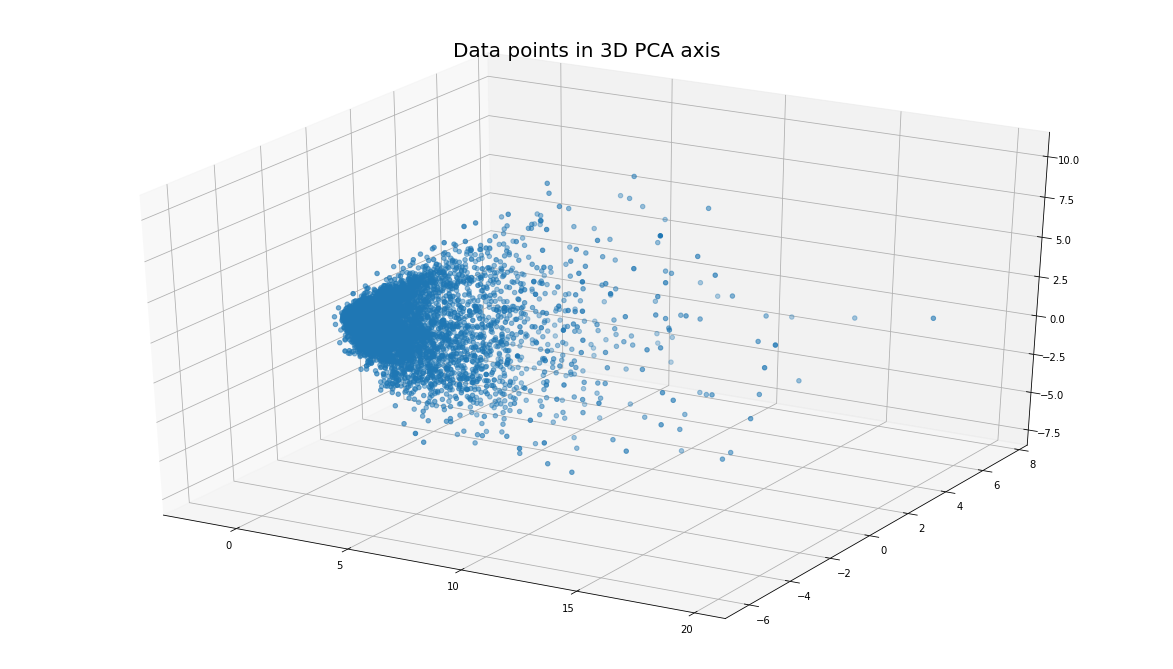

In [31]:
plt.rcParams['figure.figsize'] = (16, 9)


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

## Selecting number of k

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
inertia_list = np.empty(8)

for i in range(2,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tocluster)
    inertia_list[i] = kmeans.inertia_
    scores.append(silhouette_score(tocluster, kmeans.labels_))

In [34]:
scores

[0.5999263046431608,
 0.5791476186933341,
 0.5296372105658377,
 0.4561065542432446,
 0.45141622376179064,
 0.4442907162014115]

In [35]:
inertia_list

array([ 0.00000000e+00, -2.20000000e+01,  3.96879704e+04,  3.15058807e+04,
        2.53311528e+04,  2.20018998e+04,  1.94245007e+04,  1.74829040e+04])

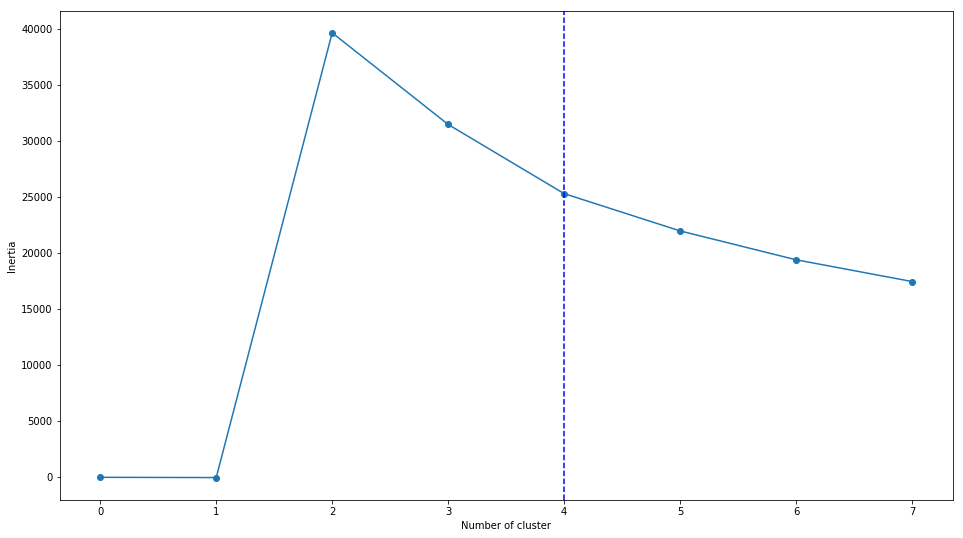

In [36]:
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Inertia')
plt.show()

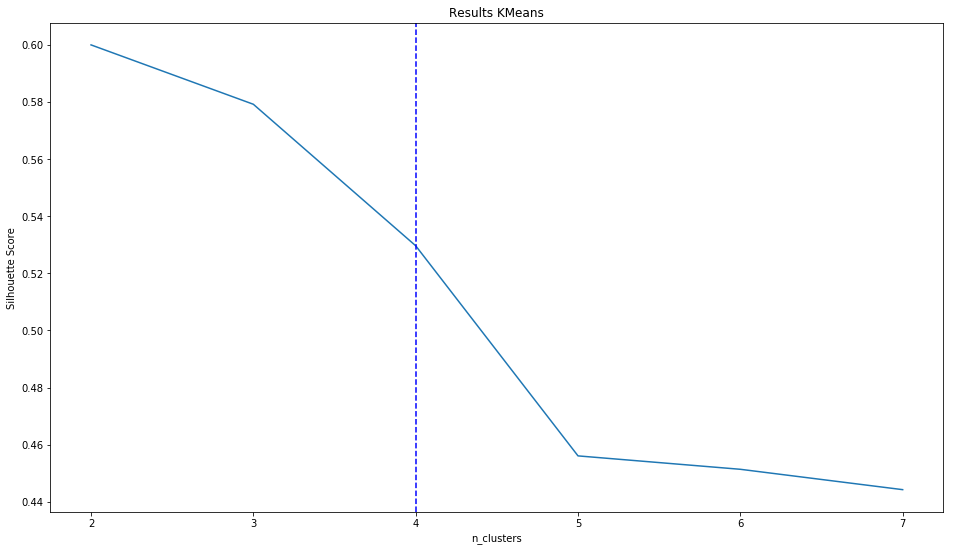

In [37]:
plt.plot(range(2,8), scores);
plt.title('Results KMeans')
plt.xlabel('n_clusters');
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Silhouette Score');
plt.show()

## K means clustering

In [39]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=4,random_state=30).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)

print(centers)

[[ 1.52204982e+00  1.98121613e+00  9.40809830e-02]
 [-1.02993768e+00 -5.27860064e-02  7.08141676e-05]
 [ 2.28876503e+00 -1.71026408e+00 -1.00638029e-01]
 [ 7.60710877e+00  6.50723898e-01  5.48971732e-02]]


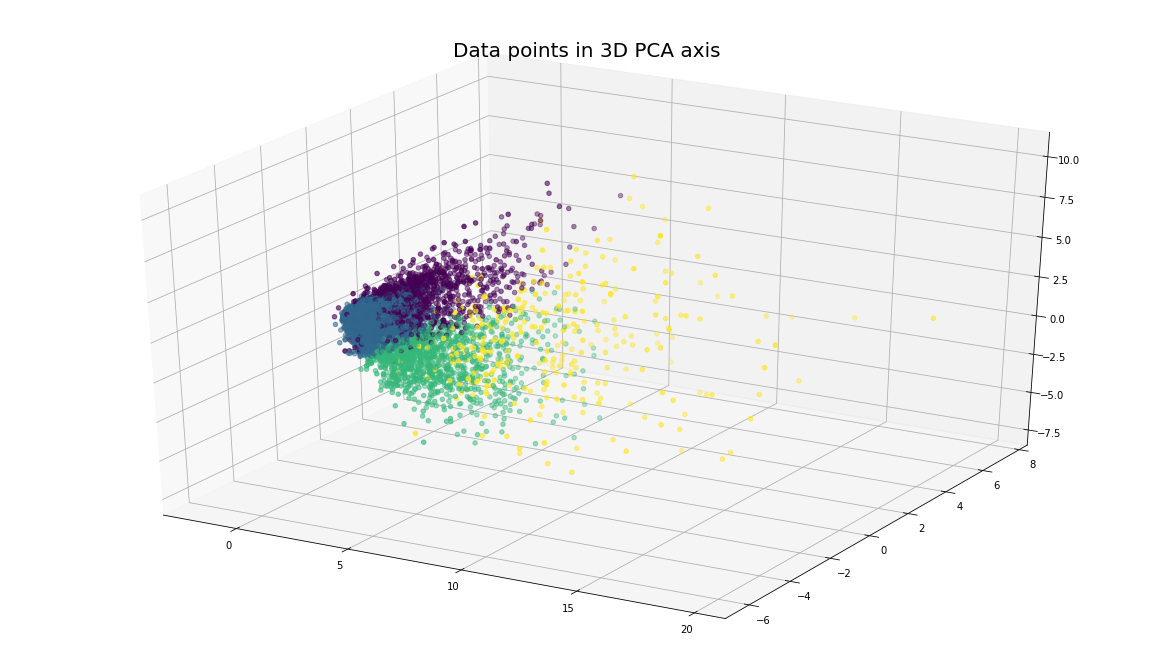

In [40]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1], c = c_preds)
plt.title('Data points in 3D PCA axis', fontsize=20)

plt.show()

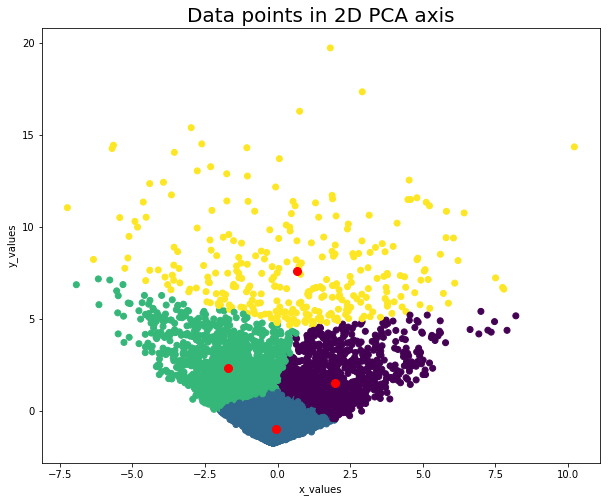

In [41]:
fig = plt.figure(figsize=(10,8))
plt.scatter(tocluster[1],tocluster[0],c = c_preds)
for ci,c in enumerate(centers):
    plt.plot(c[1], c[0], 'o', markersize=8, color='red', alpha=1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D PCA axis', fontsize=20)
plt.show()

In [42]:
user_anime['cluster'] = c_preds


user_anime.head(10)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,.hack//Quantum,...,gdgd Fairies Movie: tte Iu Eiga wa Dou kana...?,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
user_anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9467 entries, 1 to 10000
Columns: 6662 entries, &quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi to cluster
dtypes: int32(1), int64(6661)
memory usage: 481.2 MB
